🔄 Loading transaction data...
🧮 Calculating RFM metrics...
🏷 Creating risk labels...


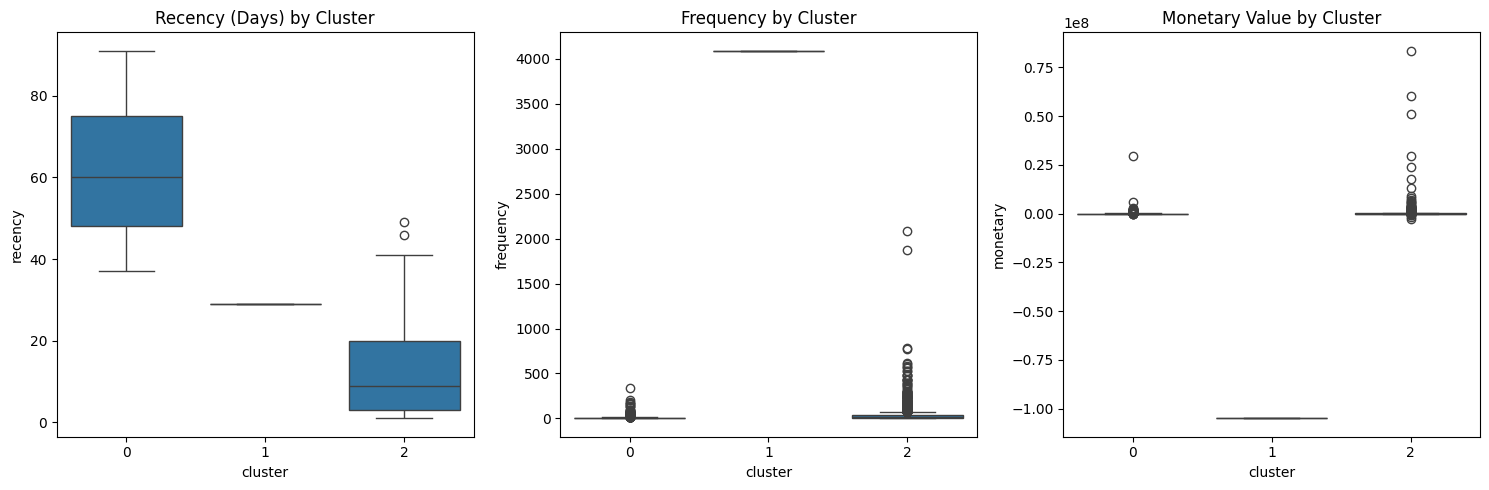

High-risk cluster: 0
📂 Loading processed features...
⚠️ Processed features not found, using raw data
🔗 Merging target with features...

Merged data shape: (95662, 20)
Target distribution:
is_high_risk
0    0.957235
1    0.042765
Name: proportion, dtype: float64
💾 Saving final dataset...

🎉 Target engineering complete!
Final dataset preview:


,CustomerId,recency,frequency,monetary,is_high_risk
0,CustomerId_4406,1,119,109921.75,0
1,CustomerId_4406,1,119,109921.75,0
2,CustomerId_4683,82,2,1000.00,0
3,CustomerId_988,6,38,228727.20,0
4,CustomerId_988,6,38,228727.20,0


In [2]:
# %% [markdown]
# # Proxy Target Variable Engineering
# 
# This notebook creates a proxy target variable for credit risk by:
# 1. Calculating RFM (Recency, Frequency, Monetary) metrics
# 2. Clustering customers based on RFM
# 3. Identifying high-risk cluster
# 4. Creating binary target variable

# %%
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

sys.path.append('..')
from src import proxy_variable


# %%
# Load data



# %%
# Configuration
DATA_PATH = '../data/raw/data.csv'
CUSTOMER_ID = 'CustomerId'
DATE_COL = 'TransactionStartTime'
AMOUNT_COL = 'Amount'

# %%
# 1. Load and prepare data
print("🔄 Loading transaction data...")
transactions = pd.read_csv(DATA_PATH)
transactions[DATE_COL] = pd.to_datetime(transactions[DATE_COL])

# %%
# 2. Calculate RFM metrics
print("🧮 Calculating RFM metrics...")
rfm = proxy_variable.calculate_rfm(
    transactions,
    customer_id_col=CUSTOMER_ID,
    date_col=DATE_COL,
    amount_col=AMOUNT_COL
)

# %%
# 3. Create high-risk labels
print("🏷 Creating risk labels...")
rfm_labeled = proxy_variable.create_high_risk_labels(rfm, plot=True)

# %%
# 4. Load processed features
print("📂 Loading processed features...")
try:
    features = pd.read_csv('../data/processed/features.csv')
    print(f"✅ Loaded features with shape: {features.shape}")
except FileNotFoundError:
    print("⚠️ Processed features not found, using raw data")
    features = transactions.copy()

# %%
# 5. Merge target with features
print("🔗 Merging target with features...")
modeling_data = proxy_variable.merge_target_with_features(features, rfm_labeled)

# Validation
assert 'is_high_risk' in modeling_data.columns
print(f"\nMerged data shape: {modeling_data.shape}")
print("Target distribution:")
print(modeling_data['is_high_risk'].value_counts(normalize=True))

# %%
# 6. Save final dataset
print("💾 Saving final dataset...")
modeling_data.to_csv('../data/processed/modeling_data.csv', index=False)

# %%
# 7. Final verification
print("\n🎉 Target engineering complete!")
print("Final dataset preview:")
display(modeling_data[[CUSTOMER_ID, 'recency', 'frequency', 'monetary', 'is_high_risk']].head())